Dataset source : https://www.kaggle.com/datasets/incarnyx/car-insurance-fraud


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_excel('Data/Dataset.xlsx', sheet_name = 'Sheet1')
data.shape

(11565, 34)

In [3]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


## About the data :
I read this dataset is the only real-word open-source insurance dataset available online and unfortunatlly I couldn't find the explainations for each column so I had to guess what each column represent in the dataset

In [4]:
for col in data.columns :
    print(col + ":")
    print(data[col].unique())
    print("--------------------------------------------------------")

Month:
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Mar' 'Aug' 'Apr' 'Jul' 'May' 'Sep' 'Nov']
--------------------------------------------------------
WeekOfMonth:
[5 3 2 1 4]
--------------------------------------------------------
DayOfWeek:
['Wednesday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Thursday']
--------------------------------------------------------
Make:
['Honda' 'Toyota' 'Mazda' 'Ford' 'Chevrolet' 'Pontiac' 'Dodge' 'Accura'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
--------------------------------------------------------
AccidentArea:
['Urban' 'Rural']
--------------------------------------------------------
DayOfWeekClaimed:
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday' 0]
--------------------------------------------------------
MonthClaimed:
['Jan' 'Nov' 'Jul' 'Feb' 'Dec' 'Mar' 'Aug' 'May' 'Apr' 'Jun' 'Sep' 'Oct' 0]
--------------------------------------------------------
WeekOfMonthClaimed:
[1 

## My understanding of the data columns :



### Inofrmation about the current date, claim date and accident date:

* Year ,Month , WeekOfMonth, DayOfWeek : The date data was enterend in the database

* DayOfWeekClaimed, MonthClaimed, WeekOfMonthClaimed :the date the claim was made

* Days_Policy_Accident : number of days between accident date and The date data was enterend in the databas (not sure) 

* Days_Policy_Claim : number of days between claim date and The date data was enterend in the databas (not sure)


------------------------------------------------------

### Information about the policyholder (costumer) :

* Sex, MaritalStatus, Age : personal information

* DriverRating : (probably) the rate to the driving skills 

* NumberOfCars : the number of cars the driver owns

* AddressChange_Claim : the last time the driver changed their address

* PastNumberOfClaims: the number of claims that has been made by this driver 

* PolicyNumber : the number assigned to this policyholder in the system

------------------------------------------------------

### Information about the car :

* Make : the company which made the car

* AgeOfVehicle, VehicleCategory,VehiclePrice : car information

------------------------------------------------------

### Information about the claim/accident  :

* AccidentArea: if accident was in the Urban or Rural area

* Fault : if the fault goes to Policy Holder or Third Party

* PoliceReportFiled: if the police was involved and filed the accident

* WitnessPresent: if any witnesses was present and can provide information

* RepNumber : the representative number who eneterd the claim in the system

* AgeOfPolicyHolder: the age range of the driver

* ClaimSize: the claim amount

* FraudFound_P : if a fraud was found in the claim

------------------------------------------------------

### Information about the policy type :

* PolicyType: the type of the policy of the policyholder

* Deductible

* BasePolicy

------------------------------------------------------

### Columns I could't guess what they are :

* AgentType: ['External' 'Internal']

* NumberOfSuppliments: ['none' 'more than 5' '1 to 2' '3 to 5']



## Distribution of  the Data

In [5]:
## I encode categorical data with label encoding method to be able to see their distribution
new_data = data.copy()
for col in data.select_dtypes(include=['object']).columns :
    le = LabelEncoder()
    new_data[col] = le.fit_transform(data[col].astype(str))

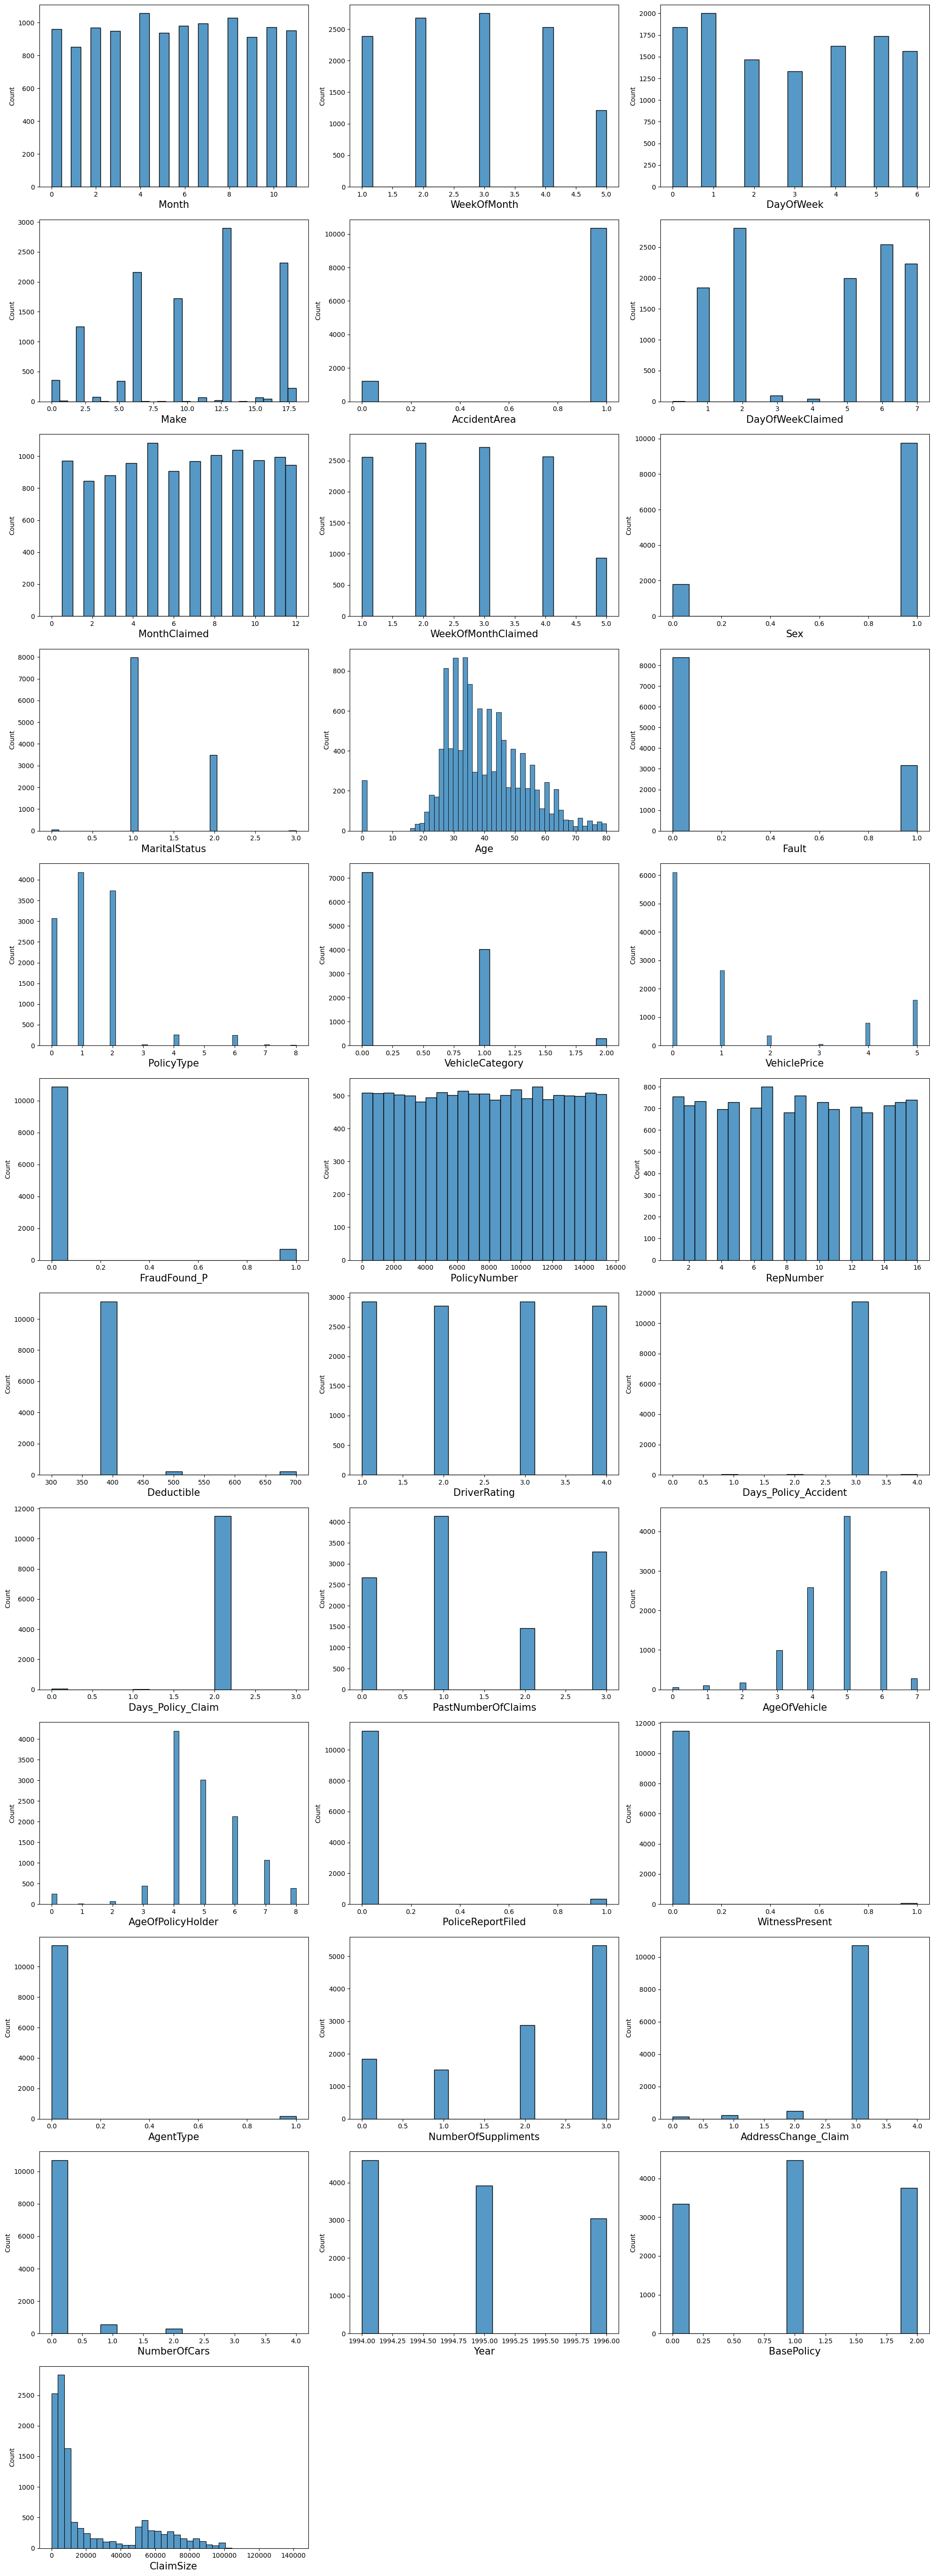

In [6]:
if not os.path.exists('Figures/Part 1'):
    os.makedirs('Figures/Part 1')
fig = plt.figure(figsize = (20, 55))
plotnumber = 1
for col in new_data:
    if plotnumber <= 34:
        ax = plt.subplot(12, 3, plotnumber)
        sns.histplot(data=new_data,x=col)
        plt.xlabel(col, fontsize = 15)  
    plotnumber += 1
plt.tight_layout()
plt.show()
fig.savefig('Figures/Part 1/all_distributions.png')

We observe that is some of the categories there are way less data than the others

***

### Numerical Data Corrolation With Target

***

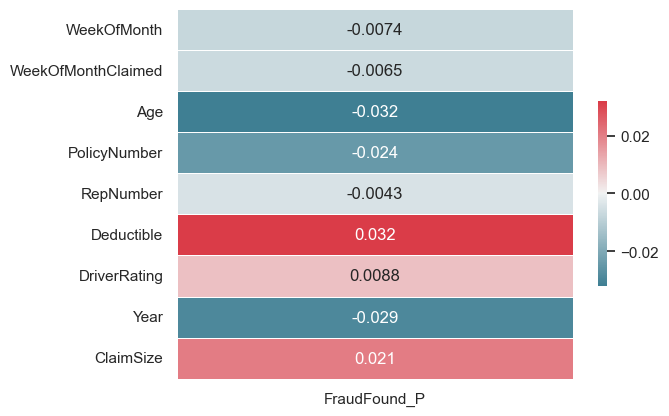

In [7]:
sns.set(style="white")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plot = sns.heatmap(data.corr(numeric_only=True)["FraudFound_P"].drop("FraudFound_P").to_frame(),cmap=cmap,center=0,annot=True,linewidths=.5, cbar_kws={"shrink": .5})
fig = plot.get_figure()
fig.savefig("Figures/Part 1/numerical_Corrolation.png") 

***
### Target Distribution in Categorical Data
***

In [8]:
categorical_data = data.select_dtypes(include=['object'])
categorical_data.nunique()

Month                   12
DayOfWeek                7
Make                    19
AccidentArea             2
DayOfWeekClaimed         8
MonthClaimed            13
Sex                      2
MaritalStatus            4
Fault                    2
PolicyType               9
VehicleCategory          3
VehiclePrice             6
Days_Policy_Accident     5
Days_Policy_Claim        4
PastNumberOfClaims       4
AgeOfVehicle             8
AgeOfPolicyHolder        9
PoliceReportFiled        2
WitnessPresent           2
AgentType                2
NumberOfSuppliments      4
AddressChange_Claim      5
NumberOfCars             5
BasePolicy               3
dtype: int64

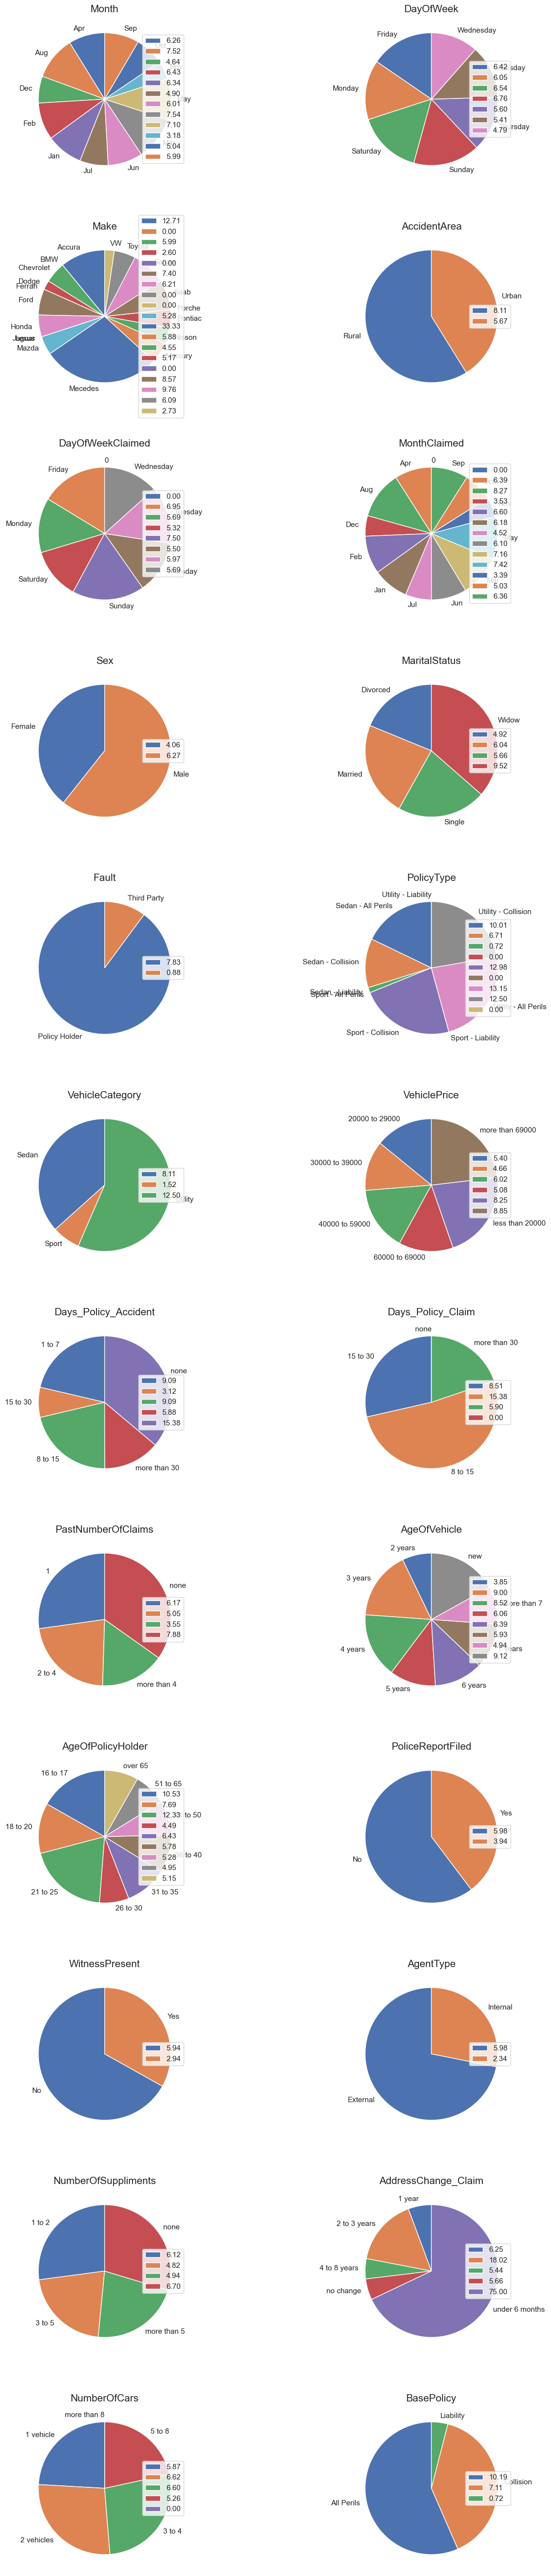

In [9]:
if not os.path.exists('Figures/Part 1'):
    os.makedirs('Figures/Part 1')
    
categorical_data["FraudFound_P"] = data["FraudFound_P"]
fig = plt.figure(figsize = (15, 53))
plotnumber = 1
for col in categorical_data.columns:
    if col == "FraudFound_P" :
        continue
    if plotnumber <= 24:
        ax = plt.subplot(12, 2, plotnumber)
        total = categorical_data.groupby(col)["FraudFound_P"].count() 
        fraud_yes_percentage = categorical_data.groupby(col)["FraudFound_P"].sum() / total *100
        patches, texts = plt.pie(fraud_yes_percentage,startangle=90,labels=fraud_yes_percentage.index)
        plt.legend(patches,[ '%.2f' % elem for elem in fraud_yes_percentage ],loc="right")
        ax.set_title(col,fontsize=15)  
        extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        fig.savefig('Figures/Part 1/{}.png'.format(col), bbox_inches=extent.expanded(1.2, 1.25))
    plotnumber += 1
plt.tight_layout()
plt.show()

***
## Results
***

In the charts above, I calculated the percentage of fraud in each group and plot it on a pie chart. The more unballanced pie chart can convey the more influence that feature has on the target.

Lest look more closely on some of the most unballanced charts and get some insights

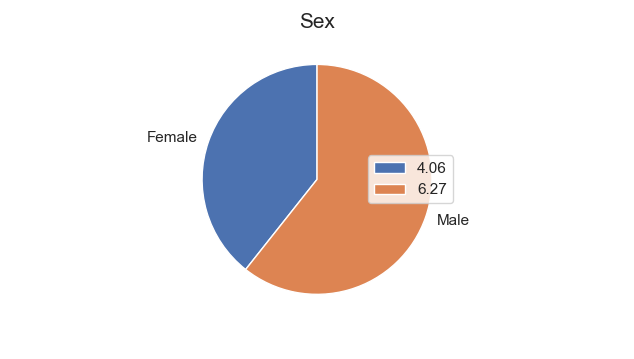

In [10]:
Image("Figures/Part 1/Sex.png")

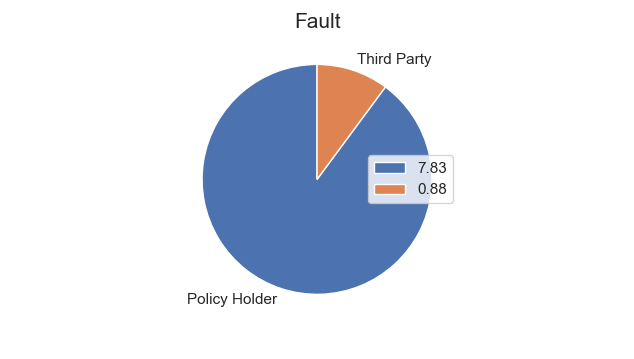

In [11]:
Image("Figures/Part 1/Fault.png")

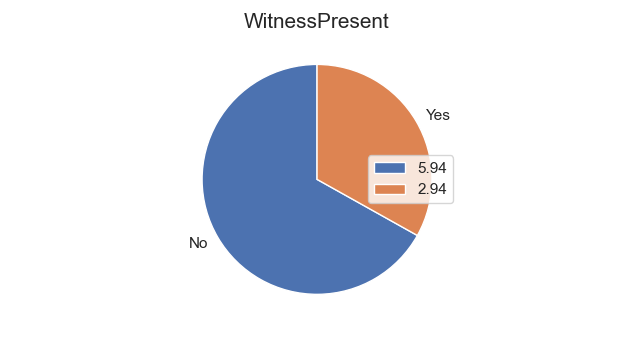

In [12]:
Image("Figures/Part 1/WitnessPresent.png")

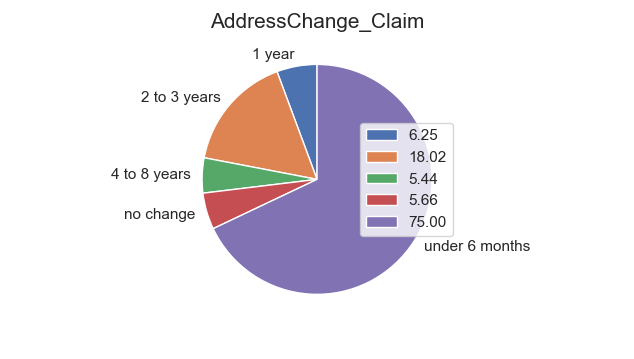

In [13]:
Image("Figures/Part 1/Addresschange_claim.png")

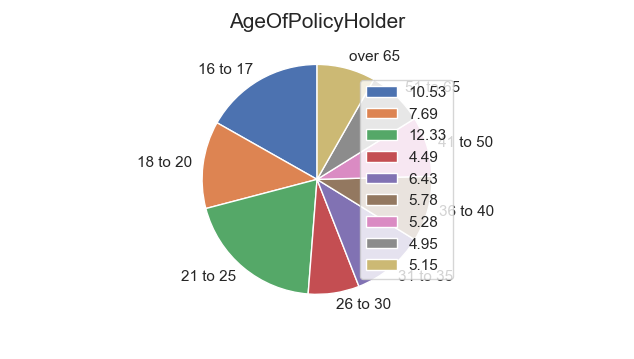

In [14]:
Image("Figures/Part 1/AgeOfPolicyHolder.png")

## Insights

This is an univariant analysis because each time we compare one feature and the output but we don't consider the combination of the features.

Our insights of the categorical data tells us :

- It is more probable to have fraud when the policyholder is a male

- It is more probable to have fraud when the policyholder is the one who caused the accident (guitly)

- It is more probable to have fraud when no witness is presented at the accident sciene 

- It is more probable to have fraud when the policyholder had a address change claim recently

- It is more probable to have fraud when the policyholder is under 25 years old

Our insights of the numerical data tells us :

- It is more probable to have fraud when the policyholder is younger
- It is more probable to have fraud when deductible is higher
- It is more probable to have fraud in the more recent years
- It is more probable to have fraud when claim size is high
